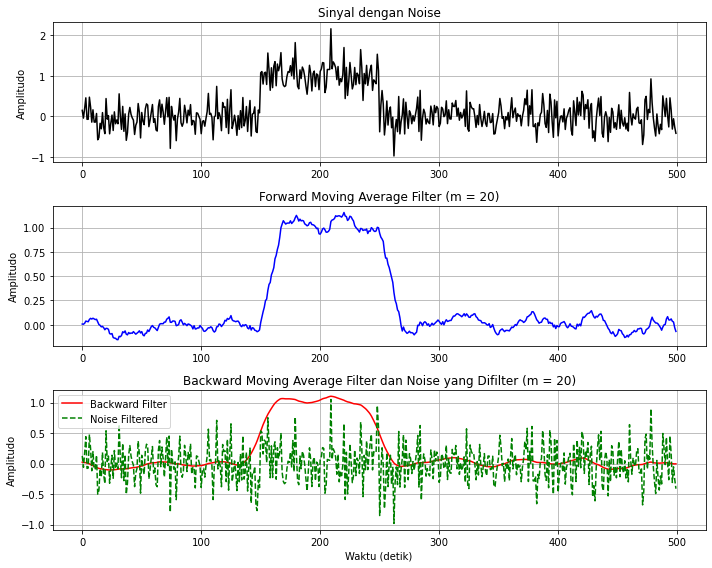

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Membuat sinyal dengan noise
np.random.seed(42)
n = 500
fs = 1  # Frekuensi sampel (bisa diubah sesuai kebutuhan)
original_signal = np.concatenate((np.zeros(150), np.ones(100), np.zeros(250)))  # Sinyal asli
noise = np.random.normal(0, 0.3, n)  # Noise acak
noisy_signal = original_signal + noise  # Sinyal dengan noise

# Parameter filter
m = 20 # Ukuran jendela filter moving average
Ndata = len(noisy_signal)

# Inisialisasi array untuk hasil filtering
y_forward = np.zeros(Ndata)
y_backward = np.zeros(Ndata)
noise_filtered = np.zeros(Ndata)

# Forward filtering
for i in range(Ndata):
    temp = 0
    for j in range(m):
        if i - j >= 0:  # Memastikan indeks tidak negatif
            temp += noisy_signal[i - j]
    y_forward[i] = temp / m

# Backward filtering
for i in range(Ndata - 1, -1, -1):
    temp = 0
    for j in range(m):
        if i + j < Ndata:  # Memastikan indeks tidak melebihi panjang sinyal
            temp += y_forward[i + j]
    y_backward[i] = temp / m
    noise_filtered[i] = noisy_signal[i] - y_backward[i]

# Plot hasil forward, backward, dan sinyal yang difilter dari noise
plt.figure(figsize=(10, 8))

# Plot sinyal dengan noise
plt.subplot(3, 1, 1)
plt.plot(np.arange(Ndata) / fs, noisy_signal, label='Sinyal dengan Noise', color='black')
plt.title('Sinyal dengan Noise')
plt.ylabel('Amplitudo')
plt.grid(True)

# Plot hasil forward filtering
plt.subplot(3, 1, 2)
plt.plot(np.arange(Ndata) / fs, y_forward, label='Forward Filter', color='blue')
plt.title(f'Forward Moving Average Filter (m = {m})')
plt.ylabel('Amplitudo')
plt.grid(True)

# Plot hasil backward filtering dan noise yang difilter
plt.subplot(3, 1, 3)
plt.plot(np.arange(Ndata) / fs, y_backward, label='Backward Filter', color='red')
plt.plot(np.arange(Ndata) / fs, noise_filtered, label='Noise Filtered', color='green', linestyle='--')
plt.title(f'Backward Moving Average Filter dan Noise yang Difilter (m = {m})')
plt.ylabel('Amplitudo')
plt.xlabel('Waktu (detik)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
